# Linear Regression in TensorFlow

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
rng = numpy.random

### Parameters

In [3]:
learning_rate = 0.01
training_epochs = 2000
display_step = 50

### Training Data

In [4]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

### TensorFlow Graph Input

In [5]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Create Model

### Set model weights

In [6]:
W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")

### Construct a linear model

In [7]:
activation = tf.add(tf.mul(X, W), b)

### Minimize the squared errors

In [8]:
cost = tf.reduce_sum(tf.pow(activation - Y, 2)) / (2 * n_samples) # L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Initializing the variables

In [9]:
init = tf.initialize_all_variables()

### Launch the graph

Epoch: 1
cost = 0.250585556   W = 0.267963498831   b = 1.28518235683
Epoch: 51
cost = 0.089279763   W = 0.187917649746   b = 1.24515879154
Epoch: 101
cost = 0.087866560   W = 0.191585943103   b = 1.2187691927
Epoch: 151
cost = 0.086616270   W = 0.195035770535   b = 1.19395136833
Epoch: 201
cost = 0.085510001   W = 0.198280334473   b = 1.17061042786
Epoch: 251
cost = 0.084531143   W = 0.201331913471   b = 1.14865744114
Epoch: 301
cost = 0.083665028   W = 0.204201921821   b = 1.12801086903
Epoch: 351
cost = 0.082898512   W = 0.206901580095   b = 1.10858988762
Epoch: 401
cost = 0.082220346   W = 0.209440350533   b = 1.09032583237
Epoch: 451
cost = 0.081620157   W = 0.211828365922   b = 1.07314693928
Epoch: 501
cost = 0.081089035   W = 0.214074403048   b = 1.05698895454
Epoch: 551
cost = 0.080618970   W = 0.216186985373   b = 1.04179108143
Epoch: 601
cost = 0.080203019   W = 0.218173921108   b = 1.02749752998
Epoch: 651
cost = 0.079834893   W = 0.220042601228   b = 1.01405405998
Epoch: 701

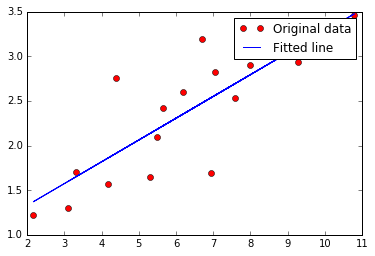

In [10]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x, Y: y})
            
        if epoch % display_step == 0:
            print "Epoch: {}".format(epoch+1)
            ct = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "cost = {:.9f}   W = {}   b = {}".format(ct, sess.run(W), sess.run(b))
            
    print "Optimization Finished!"
    ct = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
    print "cost = {:.9f}   W = {}   b = {}".format(ct, sess.run(W), sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()            

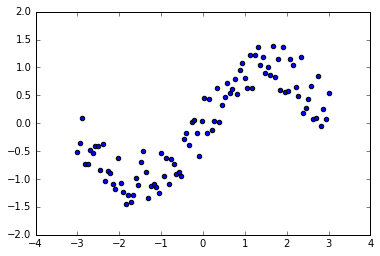

In [13]:
# %% Let's create some toy data
import numpy as np
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

In [14]:
# %% tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [15]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.mul(X, W), b)

In [16]:
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)

In [17]:
cost = tf.add(cost, tf.mul(1e-6, tf.global_norm([W])))

In [18]:
# %% Use gradient descent to optimize W,b
# Performs a single step in the negative gradient
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [22]:
# %% We create a session to use the graph
n_epochs = 100
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    sess.run(tf.initialize_all_variables())

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        training_cost = sess.run(
            cost, feed_dict={X: xs, Y: ys})
        print(training_cost)

        if epoch_i % 20 == 0:
            ax.plot(xs, Y_pred.eval(
                feed_dict={X: xs}, session=sess),
                    'k', alpha=epoch_i / n_epochs)
            fig.show()
            plt.draw()

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.001:
            break
        prev_training_cost = training_cost
fig.show()
#plt.waitforbuttonpress()  

7.48252
6.64661
5.90785
5.25493
4.67787
4.16785
3.71706
3.31862
2.96644
2.65515
2.37998
2.13675
1.92173
1.73164
1.5636
1.41503
1.28367
1.16753
1.06483
0.974016
0.893705
0.822678
0.759857
0.704289
0.655133
0.611644
0.573167
0.539118
0.508984
0.482313
0.458703
0.437799
0.419288
0.402893
0.38837
0.375502
0.364097
0.353988
0.345024
0.337073
0.330019
0.323759
0.318201
0.313264
0.308878
0.304978
0.30151
0.298424
0.295677
0.293229
0.291047
0.289101
0.287364
0.285811
0.284424
0.283182
0.282069
0.281072


In [2]:
import tensorflow as tf
import numpy as np

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
x = tf.placeholder(tf.float32, shape=[None, 784]) # None mean dimension can be of any length

In [4]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [7]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_target = tf.placeholder(tf.float32, shape=[None, 10])

In [8]:
cross_entropy = - tf.reduce_sum(y_target*tf.log(y))

In [27]:
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)

In [28]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [29]:
for i in xrange(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_target: batch_ys})

In [30]:
corr_pred = tf.equal(tf.argmax(y,1), tf.argmax(y_target,1))
accuracy = tf.reduce_mean(tf.cast(corr_pred, tf.float32))
sess.run(accuracy, feed_dict={x: mnist.test.images, y_target: mnist.test.labels})

0.91339999